# 电子产品销售数据可视化

## 一、读取数据

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('电子产品销售数据.csv')

## 二、数据评估及数据清理

在这一部分中，我们将对data所包含的数据进行评估，主要从两个方面进行：结构和内容，即整齐度和干净度。数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

In [3]:
data.sample(10)

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
221685,1775800,2020-07-22 08:55:02 UTC,2365740089255920361,2273948310383362709,2.268105e+18,computers.peripherals.mouse,razer,17.34,1.515916e+18,40.0,男,广东
563165,2632517,2020-11-16 03:47:58 UTC,2388440981134693103,1515966223509106861,2.268105e+18,NaN,sony,42.80,1.515916e+18,17.0,女,天津
190904,1734487,2020-07-23 08:55:34 UTC,2359501624755356103,1515966223509088671,2.268105e+18,electronics.smartphone,apple,925.67,1.515916e+18,30.0,女,上海
88451,941893,2020-03-29 04:38:45 UTC,2348827176809268073,1515966223509117424,2.268105e+18,computers.peripherals.monitor,samsung,328.68,1.515916e+18,29.0,女,湖南
397381,2444498,2020-10-02 10:24:45 UTC,2388440981134579481,1515966223509611739,2.268105e+18,appliances.iron,scarlett,32.38,1.515916e+18,50.0,男,江苏
548008,2614558,2020-11-18 15:00:59 UTC,2388440981134683135,1515966223509258965,2.268105e+18,stationery.battery,camelion,0.93,1.515916e+18,32.0,女,广东
98394,1012607,2020-07-10 13:34:22 UTC,2350219867048640898,1515966223521756078,2.268105e+18,appliances.environment.fan,ava,13.87,1.515916e+18,22.0,女,湖北
124868,1360875,2020-06-11 04:33:22 UTC,2353258410088071676,1515966223509258965,2.268105e+18,stationery.battery,camelion,0.93,1.515916e+18,41.0,女,上海
11117,11125,2020-05-19 11:16:05 UTC,2312461927806140485,1515966223509302878,2.268105e+18,electronics.audio.headphone,jbl,92.57,1.515916e+18,17.0,女,广东
155125,1674379,2020-05-21 02:23:21 UTC,2354508647880458816,1515966223509104361,2.268105e+18,electronics.audio.headphone,panasonic,10.39,1.515916e+18,17.0,女,重庆


从抽样的10行数据来看，`data`中的数据符合“每行是一个观察值，每列是一个变量”。

In [4]:
data=data[['event_time','order_id','product_id','category_id','category_code','brand','price','user_id','age','sex','local']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     564169 non-null  object 
 1   order_id       564169 non-null  int64  
 2   product_id     564169 non-null  int64  
 3   category_id    564169 non-null  float64
 4   category_code  434799 non-null  object 
 5   brand          536945 non-null  object 
 6   price          564169 non-null  float64
 7   user_id        564169 non-null  float64
 8   age            564169 non-null  float64
 9   sex            564169 non-null  object 
 10  local          564169 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 47.3+ MB


Unnamed: 行号(与分析无关) \
event_time：下单时间\
order_id：订单编号\
product_id:产品标号\
category_id :类别编号\
category_code :类别\
brand :品牌\
price :价格\
user_id :用户编号\
age :年龄\
sex :性别\
local:省份

从输出的内容来看，数据共有564169条观察值。\
其中`category_code`和`brand`变量中存在缺失值，将在后续进一步评估。\
针对数据类型，`event_time`数据类型应为“日期”，应当进行类型转换。

In [6]:
data[data['category_code'].isnull()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东
16,2020-04-28 02:21:45 UTC,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18,21.0,男,广东
18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,37.0,女,北京
19,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,37.0,女,北京
25,2020-04-29 03:25:12 UTC,2297729407910937541,1515966223509105105,2.268105e+18,NaN,sbs,0.02,1.515916e+18,47.0,男,广东
...,...,...,...,...,...,...,...,...,...,...,...
564144,2020-11-21 09:50:24 UTC,2388440981134693925,1515966223513916332,2.268105e+18,NaN,ava,78.68,1.515916e+18,44.0,男,北京
564150,2020-11-21 09:59:01 UTC,2388440981134693930,1515966223510177554,2.268105e+18,NaN,dji,0.23,1.515916e+18,31.0,女,上海
564151,2020-11-21 09:59:01 UTC,2388440981134693930,2273948237628965713,2.268105e+18,NaN,dji,0.23,1.515916e+18,31.0,女,上海
564161,2020-11-21 10:08:14 UTC,2388440981134693940,2273948246856434093,2.268105e+18,NaN,xiaomi,16.18,1.515916e+18,39.0,女,广东


由于缺失分析所需的核心数据`category_code`，我们将把这些观察值删除，并查看删除后该列空缺值个数和。

In [7]:
data=data.dropna(subset='category_code')
data['category_code'].isnull().sum()

0

In [8]:
data[data['brand'].isnull()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
61,2020-04-29 12:42:12 UTC,2298009757589438761,1515966223509104974,2.268105e+18,computers.peripherals.keyboard,NaN,12.71,1.515916e+18,44.0,女,广东
69,2020-04-29 12:51:50 UTC,2298014603872830244,1515966223509089420,2.268105e+18,computers.peripherals.mouse,NaN,5.07,1.515916e+18,27.0,男,重庆
88,2020-04-29 13:29:25 UTC,2298033523732251384,2273948232075706577,2.268105e+18,computers.peripherals.mouse,NaN,20.35,1.515916e+18,23.0,女,重庆
92,2020-04-29 13:31:33 UTC,2298034599193740139,2273948254808834551,2.268105e+18,appliances.kitchen.blender,NaN,74.05,1.515916e+18,40.0,女,海南
94,2020-04-29 13:31:33 UTC,2298034599193740139,1515966223509260303,2.268105e+18,furniture.kitchen.table,NaN,23.13,1.515916e+18,40.0,女,海南
...,...,...,...,...,...,...,...,...,...,...,...
563897,2020-11-21 03:49:01 UTC,2388440981134693709,2273948242175590517,2.268105e+18,computers.peripherals.mouse,NaN,2.06,1.515916e+18,25.0,女,上海
563949,2020-11-21 05:29:10 UTC,2388440981134693754,1515966223509382270,2.268105e+18,computers.components.cpu,NaN,46.27,1.515916e+18,47.0,男,北京
563963,2020-11-21 05:59:34 UTC,2388440981134693768,2337686271054316416,2.268105e+18,computers.peripherals.mouse,NaN,12.71,1.515916e+18,23.0,女,海南
563966,2020-11-21 06:03:17 UTC,2388440981134693771,2333247274437574677,2.268105e+18,furniture.kitchen.table,NaN,27.75,1.515916e+18,20.0,男,上海


由于缺失分析所需的数据`brand`对后续的分析不会产生影响，因此可以该变量的缺失值保留。

In [9]:
#因为在解析日期字符串时，时间格式和实际字符串不匹配，解析在第0个位置时遇到了一个无法解析的剩余字符串"UTC"。
data['event_time']=pd.to_datetime(data['event_time'].str[:19],format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434799 entries, 0 to 564168
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     434799 non-null  datetime64[ns]
 1   order_id       434799 non-null  int64         
 2   product_id     434799 non-null  int64         
 3   category_id    434799 non-null  float64       
 4   category_code  434799 non-null  object        
 5   brand          420718 non-null  object        
 6   price          434799 non-null  float64       
 7   user_id        434799 non-null  float64       
 8   age            434799 non-null  float64       
 9   sex            434799 non-null  object        
 10  local          434799 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 39.8+ MB


In [10]:
data.duplicated().sum()

525

In [11]:
data=data.drop_duplicates()
data.duplicated().sum()

0

输出结果为，说明不存在重复值。

针对`data`，不一致数据可能存在于`local`和`sex`变量中，我们将查看是否存在多个不同值指代同一地区，以及多个不同值指代同一性别的情况。

In [12]:
data['local'].value_counts()

local
广东    95097
上海    73604
北京    71075
湖南    26842
海南    26109
四川    25912
重庆    24445
浙江    23892
江苏    23288
天津    22803
湖北    21207
Name: count, dtype: int64

In [13]:
data['sex'].value_counts()

sex
男    218949
女    215325
Name: count, dtype: int64

从上面看出，`data`中并不存在不一致数据。

In [14]:
data.describe()

,event_time,order_id,product_id,category_id,price,user_id,age
count,434274,4.342740e+05,4.342740e+05,4.342740e+05,434274.000000,4.342740e+05,434274.000000
mean,2020-07-02 14:07:40.709563648,2.370498e+18,1.678239e+18,2.274194e+18,247.785934,1.515916e+18,33.152471
min,1970-01-01 00:33:40,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,2020-07-02 12:06:43,2.354503e+18,1.515966e+18,2.268105e+18,37.010000,1.515916e+18,24.000000
50%,2020-08-14 09:53:42,2.375517e+18,1.515966e+18,2.268105e+18,138.870000,1.515916e+18,33.000000
75%,2020-10-07 05:26:17,2.388441e+18,1.515966e+18,2.268105e+18,328.680000,1.515916e+18,42.000000
max,2020-11-21 10:10:30,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000
std,NaN,2.014598e+16,3.180363e+17,2.419753e+16,320.248441,2.369839e+07,10.115632


从以上统计信息来看，data里不存在脱离现实意义的数值。

## 三、数据整理

为了便于后续的数据分析，将对`data`数据进行整理。

根据后续的分析，需要将下单时间的年、月、日、时间提取出来

In [15]:
data['year']=data['event_time'].dt.year
data['month']=data['event_time'].dt.month
data['day']=data['event_time'].dt.day
data['hour']=data['event_time'].dt.hour
data.sample(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day,hour
494774,2020-10-30 08:23:28,2388440981134646655,1515966223511516278,2.268105e+18,computers.components.cpu,ergolux,1.60,1.515916e+18,24.0,女,北京,2020,10,30,8
465314,2020-10-22 12:40:29,2388440981134626802,1515966223510527921,2.268105e+18,appliances.kitchen.kettle,fissman,16.64,1.515916e+18,16.0,女,广东,2020,10,22,12
447842,2020-10-17 10:39:47,2388440981134614708,1515966223509104089,2.268105e+18,electronics.smartphone,oppo,208.31,1.515916e+18,20.0,女,北京,2020,10,17,10
539541,2020-11-14 12:54:00,2388440981134677452,2388434452473940483,2.268105e+18,furniture.kitchen.table,tefal,55.53,1.515916e+18,49.0,女,天津,2020,11,14,12
463780,2020-10-21 11:56:46,2388440981134625619,1515966223509122921,2.268105e+18,appliances.kitchen.coffee_grinder,polaris,30.07,1.515916e+18,37.0,女,上海,2020,10,21,11


将`data`的数据赋值给`cleaned——data`便于后续进行分析。

In [16]:
cleaned_data=data.copy()

In [17]:
#根据用户的年龄去添加用户所在的年龄段
cleaned_data['age_group']=pd.cut(cleaned_data['age'],[10,20,30,40,50],labels=['10~20','20~30','30~40','40~50'])
cleaned_data.head(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day,hour,age_group
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,2020,4,24,11,20~30
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,2020,4,24,14,30~40
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,20.0,男,重庆,2020,4,26,8,10~20
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,2020,4,26,9,20~30
10,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,24.0,男,北京,2020,4,26,14,20~30


In [18]:
#增加商品的一二级分类
#对列进行拆分
cleaned_data[['category_code_1','category_code_2','category_code_3']]=cleaned_data['category_code'].str.split('.',expand=True)
cleaned_data.sample(10)
cleaned_data=cleaned_data.drop('category_code_2',axis=1)

#cleaned_data=cleaned_data.rename({'category_code_3':'category_code_2'})
cleaned_data.sample(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day,hour,age_group,category_code_1,category_code_3
336252,2020-09-07 03:02:45,2388440981134417822,1515966223509106058,2.268105e+18,appliances.environment.air_heater,ava,9.24,1.515916e+18,32.0,女,浙江,2020,9,7,3,30~40,appliances,air_heater
97819,2020-07-10 08:50:15,2350076868218060853,1515966223509089470,2.268105e+18,computers.network.router,tp-link,27.75,1.515916e+18,48.0,女,广东,2020,7,10,8,40~50,computers,router
260339,2020-08-10 04:19:37,2372408704763953439,2273948186768835178,2.268105e+18,computers.notebook,svc,113.40,1.515916e+18,21.0,男,上海,2020,8,10,4,20~30,computers,None
29442,2020-06-27 08:27:42,2340643436836684124,1515966223509088639,2.268105e+18,electronics.smartphone,samsung,347.20,1.515916e+18,30.0,男,北京,2020,6,27,8,20~30,electronics,None
185651,2020-07-21 12:23:07,2358156539379843844,1515966223509104944,2.268105e+18,electronics.smartphone,samsung,104.14,1.515916e+18,17.0,男,上海,2020,7,21,12,10~20,electronics,None


In [19]:
#用户数量
cleaned_data['user_id'].nunique()

87699

## 三、数据探索

In [37]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434274 entries, 0 to 564168
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_time       434274 non-null  datetime64[ns]
 1   order_id         434274 non-null  int64         
 2   product_id       434274 non-null  int64         
 3   category_id      434274 non-null  float64       
 4   category_code    434274 non-null  object        
 5   brand            420218 non-null  object        
 6   price            434274 non-null  float64       
 7   user_id          434274 non-null  float64       
 8   age              434274 non-null  float64       
 9   sex              434274 non-null  object        
 10  local            434274 non-null  object        
 11  year             434274 non-null  int32         
 12  month            434274 non-null  int32         
 13  day              434274 non-null  int32         
 14  hour             434274 n

In [38]:
cleaned_data.sample(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day,hour,age_group,category_code_1,category_code_3
186490,2020-07-21 09:51:21,2358487393050296582,1515966223509089918,2.268105e+18,appliances.kitchen.refrigerators,birjusa,249.98,1.515916e+18,33.0,女,湖南,2020,7,21,9,30~40,appliances,refrigerators
13863,2020-05-23 07:29:42,2315247090986385752,2273948316532212461,2.268105e+18,electronics.smartphone,huawei,578.68,1.515916e+18,23.0,男,北京,2020,5,23,7,20~30,electronics,None
388491,2020-09-30 01:37:08,2388440981134560408,2326815104722535166,2.268105e+18,electronics.smartphone,oppo,416.64,1.515916e+18,34.0,女,湖北,2020,9,30,1,30~40,electronics,None
388624,2020-09-30 05:10:10,2388440981134560527,2273948237578633996,2.268105e+18,computers.network.router,d-link,16.18,1.515916e+18,19.0,男,重庆,2020,9,30,5,10~20,computers,router
561130,2020-11-19 07:34:59,2388440981134691814,1515966223509262690,2.268105e+18,furniture.kitchen.table,tvs,13.87,1.515916e+18,50.0,男,湖南,2020,11,19,7,40~50,furniture,table


### 用户RFM等级画像

将`cleaned_data`的数据复制给`rfm`，用作分析用户RFM等级画像。

In [63]:
rfm=cleaned_data.copy()

RMF涉及到消费时间间隔、消费频率、消费金额，可以保留相关数据，方便后续分析。

In [64]:
rfm=rfm[['user_id','event_time','price']]
rfm.sample(10)

,user_id,event_time,price
445878,1.515916e+18,2020-10-16 11:49:38,49.75
49757,1.515916e+18,2020-01-26 11:11:45,16.18
367172,1.515916e+18,2020-09-18 13:11:14,555.53
398357,1.515916e+18,2020-10-03 13:23:25,196.74
472994,1.515916e+18,2020-10-22 12:25:56,28.91
407801,1.515916e+18,2020-10-05 04:46:05,277.75
441462,1.515916e+18,2020-10-14 06:05:50,254.61
427167,1.515916e+18,2020-10-10 05:57:28,3.45
515952,1.515916e+18,2020-11-03 12:50:19,428.22
259753,1.515916e+18,2020-08-09 19:12:24,10.39


In [65]:
#消费频率
rfm['days'] = (pd.to_datetime("2020-12-31")-rfm["event_time"]).dt.days

根据rfm模型对用户进行分类：

In [66]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>0 else '0')
    RMF=level.R+level.F+level.M
    dic_rfm={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '100':'一般发展客户',
        '010':'一般保持客户',
        '000':'一般挽留客户'}
    result=dic_rfm[RFM]
    return result

In [67]:
#把用户id作为索引,根据在一段时间内的消费情况，对数据进行聚合操作
rfm=pd.pivot_table(rfm,index='user_id',values=['user_id','days','price'],aggfunc={'user_id':'count','days':'min','price':'sum'})

In [68]:
rfm.head()

,days,price,user_id
user_id,,,
1.515916e+18,174,416.64,1
1.515916e+18,63,56.43,2
1.515916e+18,44,5984.92,12
1.515916e+18,71,3659.56,7
1.515916e+18,169,182.83,2


In [69]:
rfm=rfm[['days','user_id','price']]
rfm.head()

,days,user_id,price
user_id,,,
1.515916e+18,174,1,416.64
1.515916e+18,63,2,56.43
1.515916e+18,44,12,5984.92
1.515916e+18,71,7,3659.56
1.515916e+18,169,2,182.83


In [70]:
rfm.columns=['R','F','M']
rfm.head()

,R,F,M
user_id,,,
1.515916e+18,174,1,416.64
1.515916e+18,63,2,56.43
1.515916e+18,44,12,5984.92
1.515916e+18,71,7,3659.56
1.515916e+18,169,2,182.83


In [75]:
rfm['RMF']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,R,F,M,RMF
user_id,,,,
1.515916e+18,174,1,416.64,一般发展客户
1.515916e+18,63,2,56.43,一般挽留客户
1.515916e+18,44,12,5984.92,重要保持客户
1.515916e+18,71,7,3659.56,重要保持客户
1.515916e+18,169,2,182.83,一般发展客户


In [ ]:
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

[Text(0, 0, '一般发展客户'),
 Text(1, 0, '一般挽留客户'),
 Text(2, 0, '重要保持客户'),
 Text(3, 0, '一般价值客户'),
 Text(4, 0, '一般保持客户'),
 Text(5, 0, '重要价值客户'),
 Text(6, 0, '重要挽留客户'),
 Text(7, 0, '重要发展客户')]

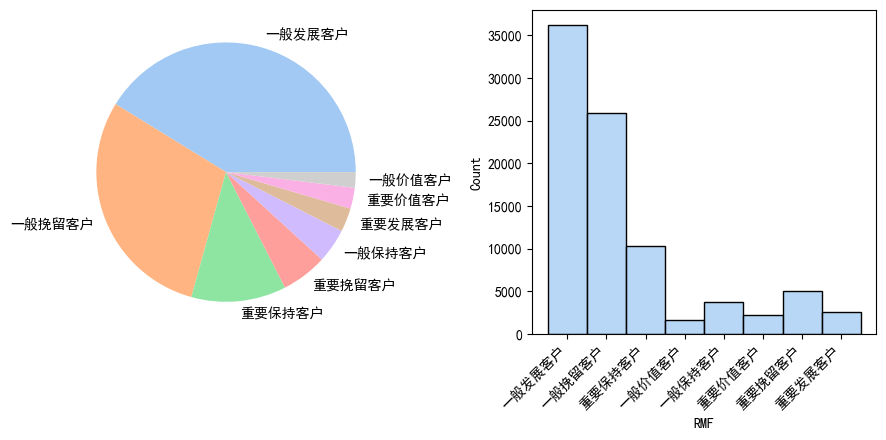

In [109]:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
#设置色盘
sns.set_palette("pastel")
#中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
#绘制饼图
rfm_count=rfm['RMF'].value_counts()
rfm_label=rfm_count.index
axes[0].pie(rfm_count,labels=rfm_label)
#绘制柱状图
sns.histplot(rfm,x='RMF',ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')